In [1]:
import os

import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

# librosa is a Python library for analyzing audio and music.
# It can be used to extract the data from the audio files
import librosa 
import librosa.display
import audioread
# to play the audio files
from IPython.display import Audio
plt.style.use('seaborn-white')
import soundfile

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

import sys

from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.metrics import confusion_matrix, classification_report

import keras
from keras.callbacks import ReduceLROnPlateau
from keras.models import Sequential
from keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, BatchNormalization
from keras.utils import np_utils, to_categorical
from keras.callbacks import ModelCheckpoint

import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning) 

In [2]:
TESS = "/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/"
RAV = "/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/"
SAVEE = "/Users/kokilareddy/Downloads/download/AudioData/"
CREMA = "/Users/kokilareddy/Downloads/download/AudioWAV/"

In [3]:
# Get the data location for SAVEE
dir_list = os.listdir(SAVEE)

# parse the filename to get the emotions
emotion=[]
path = []
for i in dir_list:
    if i[-8:-6]=='_a':
        emotion.append('angry')
    elif i[-8:-6]=='_d':
        emotion.append('disgust')
    elif i[-8:-6]=='_f':
        emotion.append('fear')
    elif i[-8:-6]=='_h':
        emotion.append('happy')
    elif i[-8:-6]=='_n':
        emotion.append('neutral')
    elif i[-8:-6]=='sa':
        emotion.append('sad')
    elif i[-8:-6]=='su':
        emotion.append('surprise')
    else:
        emotion.append('unknown') 
    path.append(SAVEE + i)

# Now check out the label count distribution 
SAVEE_df = pd.DataFrame(emotion, columns = ['Emotion'])
SAVEE_df = pd.concat([SAVEE_df, pd.DataFrame(path, columns = ['Path'])], axis = 1)
print('SAVEE dataset')
SAVEE_df.head()

SAVEE dataset


,Emotion,Path
0,sad,/Users/kokilareddy/Downloads/download/AudioDat...
1,sad,/Users/kokilareddy/Downloads/download/AudioDat...
2,neutral,/Users/kokilareddy/Downloads/download/AudioDat...
3,surprise,/Users/kokilareddy/Downloads/download/AudioDat...
4,neutral,/Users/kokilareddy/Downloads/download/AudioDat...


In [4]:
# Get the data location for TESS
path = []
emotion = []
dir_list = os.listdir(TESS)

for i in dir_list:
    fname = os.listdir(TESS + i)   
    for f in fname:
        if i == 'OAF_angry' or i == 'YAF_angry':
            emotion.append('angry')
        elif i == 'OAF_disgust' or i == 'YAF_disgust':
            emotion.append('disgust')
        elif i == 'OAF_Fear' or i == 'YAF_fear':
            emotion.append('fear')
        elif i == 'OAF_happy' or i == 'YAF_happy':
            emotion.append('happy')
        elif i == 'OAF_neutral' or i == 'YAF_neutral':
            emotion.append('neutral')                                
        elif i == 'OAF_Pleasant_surprise' or i == 'YAF_pleasant_surprised':
            emotion.append('surprise')               
        elif i == 'OAF_Sad' or i == 'YAF_sad':
            emotion.append('sad')
        else:
            emotion.append('Unknown')
        path.append(TESS + i + "/" + f)

TESS_df = pd.DataFrame(emotion, columns = ['Emotion'])
#TESS_df['source'] = 'TESS'
TESS_df = pd.concat([TESS_df,pd.DataFrame(path, columns = ['Path'])],axis=1)
print('TESS dataset')
TESS_df.head()

TESS dataset


,Emotion,Path
0,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
1,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
2,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
3,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...
4,disgust,/Users/kokilareddy/Downloads/download/TESS Tor...


In [5]:
dir = os.listdir(RAV)

males = []
females = [] 
        
for actor in dir:
       
    files = os.listdir(RAV + actor)
        
    for file in files: 
        part = file.split('.')[0]
        part = part.split("-")           
            
        temp = int(part[6])        
                
        if part[2] == '01':
            emotion = 'neutral'
        elif part[2] == '02':
            emotion = 'calm'
        elif part[2] == '03':
            emotion = 'happy'
        elif part[2] == '04':
            emotion = 'sad'
        elif part[2] == '05':
            emotion = 'angry'
        elif part[2] == '06':
            emotion = 'fear'
        elif part[2] == '07':
            emotion = 'disgust'
        elif part[2] == '08':
            emotion = 'surprise'
        else:
            emotion = 'unknown'
            
        if temp%2 == 0:
            path = (RAV + actor + '/' + file)
            #emotion = 'female_'+emotion
            females.append([emotion, path]) 
        else:
            path = (RAV + actor + '/' + file)
             #emotion = 'male_'+emotion
            males.append([emotion, path])   
    
   
RavFemales_df = pd.DataFrame(females)
RavFemales_df.columns = ['Emotion', 'Path']

RavMales_df = pd.DataFrame(males)
RavMales_df.columns = ['Emotion', 'Path']

print('RAVDESS datasets')
RavFemales_df.head()


RAVDESS datasets


,Emotion,Path
0,angry,/Users/kokilareddy/Downloads/download/audio_sp...
1,fear,/Users/kokilareddy/Downloads/download/audio_sp...
2,fear,/Users/kokilareddy/Downloads/download/audio_sp...
3,angry,/Users/kokilareddy/Downloads/download/audio_sp...
4,disgust,/Users/kokilareddy/Downloads/download/audio_sp...


In [6]:
files = os.listdir(CREMA)

female = [1002,1003,1004,1006,1007,1008,1009,1010,1012,1013,1018,1020,1021,1024,1025,1028,1029,1030,1037,1043,1046,1047,1049,
          1052,1053,1054,1055,1056,1058,1060,1061,1063,1072,1073,1074,1075,1076,1078,1079,1082,1084,1089,1091]
males = []
females = []

for file in files: 
    part = file.split('_')   
    
    if part[2] == 'SAD':
        emotion = 'sad'
    elif part[2] == 'ANG':
        emotion = 'angry'
    elif part[2] == 'DIS':
        emotion = 'disgust'
    elif part[2] == 'FEA':
        emotion = 'fear'
    elif part[2] == 'HAP':
        emotion = 'happy'
    elif part[2] == 'NEU':
        emotion = 'neutral'  
    else:
        emotion = 'unknown'
        
    if int(part[0]) in female:
        path = (CREMA + '/' + file)
        #emotion = 'female_'+emotion
        females.append([emotion, path]) 
    else:
        path = (CREMA + '/' + file)
        #emotion = 'male_'+emotion
        males.append([emotion, path])   
    
CremaFemales_df = pd.DataFrame(females)
CremaFemales_df.columns = ['Emotion', 'Path']

CremaMales_df = pd.DataFrame(males)
CremaMales_df.columns = ['Emotion', 'Path']
    
print('CREMA datasets')
CremaFemales_df.head()

CREMA datasets


,Emotion,Path
0,angry,/Users/kokilareddy/Downloads/download/AudioWAV...
1,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...
2,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...
3,disgust,/Users/kokilareddy/Downloads/download/AudioWAV...
4,sad,/Users/kokilareddy/Downloads/download/AudioWAV...


In [7]:
CremaFemales_df['Gender'] = 'Female'

In [8]:
CremaMales_df['Gender'] = 'Male'

In [9]:
TESS_df['Gender']='Female'
RavFemales_df['Gender']='Female'
RavMales_df['Gender']='Male'
SAVEE_df['Gender']='Male'

In [10]:
Audiodata=CremaFemales_df.append(CremaMales_df, ignore_index=True).append(TESS_df, ignore_index=True).append(RavFemales_df, ignore_index=True).append(RavMales_df, ignore_index=True).append(SAVEE_df, ignore_index=True)

In [11]:
Audiodata

,Emotion,Path,Gender
0,angry,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
1,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
2,neutral,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
3,disgust,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
4,sad,/Users/kokilareddy/Downloads/download/AudioWAV...,Female
...,...,...,...
12157,angry,/Users/kokilareddy/Downloads/download/AudioDat...,Male
12158,angry,/Users/kokilareddy/Downloads/download/AudioDat...,Male
12159,neutral,/Users/kokilareddy/Downloads/download/AudioDat...,Male
12160,surprise,/Users/kokilareddy/Downloads/download/AudioDat...,Male


In [12]:
Audiodata.Emotion.unique() 

array(['angry', 'neutral', 'disgust', 'sad', 'fear', 'happy', 'surprise',
       'calm'], dtype=object)

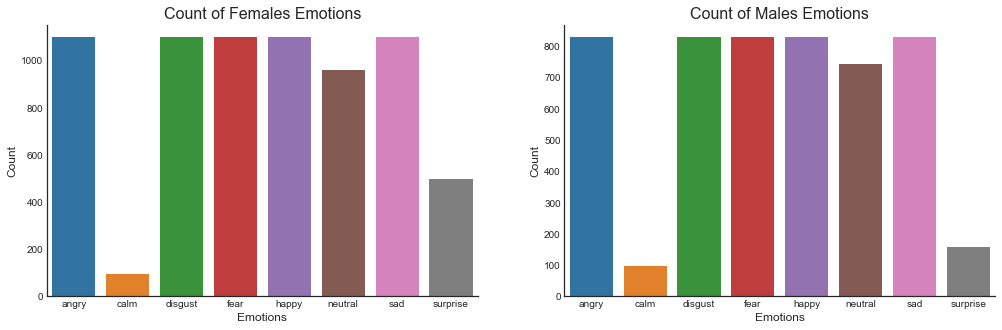

In [13]:
Males = pd.concat([SAVEE_df, RavMales_df, CremaMales_df], axis = 0)
Males.to_csv("males_emotions_df.csv", index = False)

Females = pd.concat([TESS_df, RavFemales_df, CremaFemales_df], axis = 0)
Females.to_csv("females_emotions_df.csv", index = False)

order = ['angry','calm','disgust','fear','happy','neutral','sad','surprise']

fig = plt.figure(figsize=(17, 5))

fig.add_subplot(121)
plt.title('Count of Females Emotions', size=16)
sns.countplot(Females.Emotion, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

fig.add_subplot(122)
plt.title('Count of Males Emotions', size=16)
sns.countplot(Males.Emotion, order = order)
plt.ylabel('Count', size=12)
plt.xlabel('Emotions', size=12)
sns.despine(top=True, right=True, left=False, bottom=False)

plt.show()

In [14]:
Audiodata['Paths']=Audiodata['Path']+"@"+Audiodata['Emotion']
Paths=Audiodata['Paths']

In [15]:
# LSTM
import keras
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import *
from keras.optimizers import RMSprop

In [16]:
def extract_mfcc(wav_file_name):
    #This function extracts mfcc features and obtain the mean of each dimension
    #Input : path_to_wav_file
    #Output: mfcc_features'''
    data,sr=librosa.load(wav_file_name , res_type='kaiser_fast')
    result = np.array([])    
    mfccs = librosa.feature.mfcc(y=data, sr=sr, n_mfcc=40)
    mfccs_processed = np.mean(mfccs.T,axis=0)
    return mfccs_processed

Audio_labels = []
Audio_data = []
for file in Paths:
    print(file)
    File=file.split("@")[0]
    emotion=file.split("@")[1]
    Audio_data.append(extract_mfcc(File)) # extract MFCC features/file
    if(emotion == "angry"):
        Audio_labels.append([0])
    elif(emotion == "neutral"):
        Audio_labels.append([1])
    elif(emotion == "disgust"):
        Audio_labels.append([2])
    elif(emotion == "sad"):
        Audio_labels.append([3])
    elif(emotion == "fear"):
        Audio_labels.append([4])
    elif(emotion == "happy"):
        Audio_labels.append([5])
    elif(emotion == "surprise"):
        Audio_labels.append([6])
    else:
        Audio_labels.append([7])

/Users/kokilareddy/Downloads/download/AudioWAV//1037_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1060_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1075_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1073_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1078_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1029_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1008_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1018_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1028_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1018_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1054_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1028_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1018_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/downlo

/Users/kokilareddy/Downloads/download/AudioWAV//1037_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1028_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1009_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1049_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1029_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1012_IWW_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1018_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1007_IWW_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1037_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1004_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1020_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1025_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1013_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/Au

/Users/kokilareddy/Downloads/download/AudioWAV//1020_IEO_DIS_HI.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1029_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1060_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1075_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1037_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1046_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1053_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1056_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1049_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1043_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1053_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1046_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1091_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downlo

/Users/kokilareddy/Downloads/download/AudioWAV//1025_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1021_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1030_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1089_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1061_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1037_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1084_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1003_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1091_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1037_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1003_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1030_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV

/Users/kokilareddy/Downloads/download/AudioWAV//1004_IOM_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1082_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1091_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1084_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1003_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1024_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1073_IWW_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1018_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1029_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1049_ITH_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1020_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1009_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1028_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1008_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1029_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1079_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1049_IWL_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1043_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1056_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1052_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1047_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1028_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1084_IWW_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1091_IWW_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1028_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1079_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/downlo

/Users/kokilareddy/Downloads/download/AudioWAV//1056_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1043_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1075_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1054_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1091_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1084_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1043_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1056_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1007_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1024_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1012_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1021_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1010_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1075_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1060_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1082_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1055_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1078_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1058_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1078_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1078_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1049_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1055_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1058_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1029_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1056_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Download

/Users/kokilareddy/Downloads/download/AudioWAV//1013_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1029_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1078_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1020_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1061_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1030_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1025_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1024_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1010_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1049_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1012_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWA

/Users/kokilareddy/Downloads/download/AudioWAV//1029_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1024_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1037_IEO_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1013_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1006_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1025_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1030_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1004_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1037_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1029_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IEO_DIS_HI.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1091_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1084_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/Au

/Users/kokilareddy/Downloads/download/AudioWAV//1075_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1060_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1010_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1047_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1052_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1054_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1043_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1056_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1060_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1075_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1037_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1009_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1055_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads

/Users/kokilareddy/Downloads/download/AudioWAV//1004_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1025_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1030_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1078_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1073_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1082_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1084_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1078_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1091_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1030_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1025_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1018_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1049_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1078_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1054_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1075_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1060_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1009_IWW_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1020_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IEO_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1053_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1046_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1073_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1047_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1052_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1055_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWA

/Users/kokilareddy/Downloads/download/AudioWAV//1010_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1025_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1030_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1003_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1020_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1055_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1004_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1074_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1061_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1089_IOM_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1054_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1076_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1003_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/Au

/Users/kokilareddy/Downloads/download/AudioWAV//1053_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1008_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1089_IEO_DIS_LO.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1061_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1008_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1089_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1049_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1029_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1008_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1020_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1055_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1056_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/downloa

/Users/kokilareddy/Downloads/download/AudioWAV//1002_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1018_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1002_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1076_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1063_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1055_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1024_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1020_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1013_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1006_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1009_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1020_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1018_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/d

/Users/kokilareddy/Downloads/download/AudioWAV//1053_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1046_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1073_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1055_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1061_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1074_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1089_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1047_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1052_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IWW_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1061_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1008_ITH_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV/

/Users/kokilareddy/Downloads/download/AudioWAV//1025_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1030_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1056_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1043_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1018_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1063_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1076_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1074_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1061_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1091_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1084_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1010_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1006_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/A

/Users/kokilareddy/Downloads/download/AudioWAV//1073_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1028_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1029_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1008_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1047_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1052_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1089_ITH_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1078_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1078_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1075_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1060_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1053_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1046_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/down

/Users/kokilareddy/Downloads/download/AudioWAV//1084_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1020_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1054_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1010_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1003_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1058_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1021_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1024_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1073_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1007_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1012_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1018_IEO_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1009_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/d

/Users/kokilareddy/Downloads/download/AudioWAV//1061_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1024_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1075_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1060_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1054_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1047_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1043_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1056_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1052_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1073_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1056_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1029_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1

/Users/kokilareddy/Downloads/download/AudioWAV//1079_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1058_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1052_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1047_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1006_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1013_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1082_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1002_IEO_DIS_HI.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1049_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1004_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1091_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1084_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1089_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads

/Users/kokilareddy/Downloads/download/AudioWAV//1073_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1028_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1010_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1060_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1024_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1075_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1079_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1061_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1046_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1053_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1072_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/Audi

/Users/kokilareddy/Downloads/download/AudioWAV//1091_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1079_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1084_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1091_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1082_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1009_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1028_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1018_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1028_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1060_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1075_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1079_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioW

/Users/kokilareddy/Downloads/download/AudioWAV//1009_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1089_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1091_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1084_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1075_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1060_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1078_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1072_IWL_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1030_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1025_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1073_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1024_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1012_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/downlo

/Users/kokilareddy/Downloads/download/AudioWAV//1058_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1009_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1091_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1084_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1018_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1010_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1028_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1084_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1091_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1013_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1006_TIE_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1025_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1030_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/A

/Users/kokilareddy/Downloads/download/AudioWAV//1003_IEO_SAD_MD.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1037_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1082_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1003_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1007_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1012_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1018_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1030_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1025_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1004_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1049_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1021_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1025_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioW

/Users/kokilareddy/Downloads/download/AudioWAV//1046_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1013_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1006_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1002_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1018_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1084_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1091_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1029_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1074_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1061_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1049_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1078_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1029_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/Aud

/Users/kokilareddy/Downloads/download/AudioWAV//1029_IWW_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1008_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1003_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1012_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1007_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1082_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1072_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1030_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1082_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1025_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1003_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1006_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1013_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/Aud

/Users/kokilareddy/Downloads/download/AudioWAV//1060_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1075_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1072_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1046_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1053_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1024_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1072_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1053_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1046_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1058_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1002_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1075_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1060_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//

/Users/kokilareddy/Downloads/download/AudioWAV//1007_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1082_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1021_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1076_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1063_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1061_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1074_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1063_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1076_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1021_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1082_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1003_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/do

/Users/kokilareddy/Downloads/download/AudioWAV//1007_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1073_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1052_IOM_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1047_IOM_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1089_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1008_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1055_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1075_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1060_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1054_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1020_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1072_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1063_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV

/Users/kokilareddy/Downloads/download/AudioWAV//1041_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1080_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1050_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1045_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1087_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1019_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1038_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1080_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1022_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1086_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1011_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1065_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1088_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/Au

/Users/kokilareddy/Downloads/download/AudioWAV//1057_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1026_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1033_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1005_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1031_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1064_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1071_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1083_IEO_DIS_LO.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1041_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1017_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1005_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1090_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1017_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1085_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1040_ITH_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1066_IEO_DIS_LO.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1081_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1026_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1033_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1022_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1038_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1088_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1015_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1081_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/downloa

/Users/kokilareddy/Downloads/download/AudioWAV//1035_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1038_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1034_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1065_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1070_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1005_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1031_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1069_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1027_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1032_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1065_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/

/Users/kokilareddy/Downloads/download/AudioWAV//1088_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1062_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1077_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1067_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1057_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1042_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1086_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1040_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1066_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1045_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1050_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1067_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1088_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/A

/Users/kokilareddy/Downloads/download/AudioWAV//1036_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1023_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1016_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1032_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1027_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1086_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1080_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1034_IEO_DIS_HI.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1064_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1071_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1085_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1090_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IOM_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/

/Users/kokilareddy/Downloads/download/AudioWAV//1023_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1086_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1001_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1014_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1031_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1005_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1034_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1039_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1080_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1001_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1014_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IEO_DIS_LO.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1027_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/down

/Users/kokilareddy/Downloads/download/AudioWAV//1090_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1011_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1031_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1066_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1040_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1071_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1064_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1050_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1045_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IEO_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IEO_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1057_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1042_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1040_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1067_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1088_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1041_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1068_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1048_ITH_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1045_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1050_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1080_IEO_DIS_LO.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1042_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1057_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1001_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1014_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/Aud

/Users/kokilareddy/Downloads/download/AudioWAV//1036_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1023_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1027_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1032_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1034_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1038_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1005_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1022_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1016_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1026_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1033_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1081_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1050_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download

/Users/kokilareddy/Downloads/download/AudioWAV//1059_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1035_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1080_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1068_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1014_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1001_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1040_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1031_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1066_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1042_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1057_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/downlo

/Users/kokilareddy/Downloads/download/AudioWAV//1090_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1077_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1062_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1034_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1015_WSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1087_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1070_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1065_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1011_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1033_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1022_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/Aud

/Users/kokilareddy/Downloads/download/AudioWAV//1034_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1050_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1045_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1040_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1041_IEO_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1067_IWW_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1068_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1048_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1068_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1086_IWW_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1026_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1033_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1077_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Down

/Users/kokilareddy/Downloads/download/AudioWAV//1040_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1044_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1059_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1087_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1048_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1019_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1086_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1083_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1022_IEO_DIS_HI.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1069_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1067_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1026_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1086_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads

/Users/kokilareddy/Downloads/download/AudioWAV//1032_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1023_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1005_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1045_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1050_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1064_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1071_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1005_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1032_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1027_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1080_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1014_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1001_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/

/Users/kokilareddy/Downloads/download/AudioWAV//1067_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1059_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1039_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1048_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1059_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1059_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1039_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1080_IWW_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1038_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1019_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1071_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1064_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/downlo

/Users/kokilareddy/Downloads/download/AudioWAV//1027_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1011_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1032_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1022_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1087_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1035_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1040_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1017_WSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1090_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1085_ITH_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1017_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1040_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1057_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1062_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1077_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1066_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1083_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1038_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1019_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1014_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1001_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1045_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1050_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1090_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads

/Users/kokilareddy/Downloads/download/AudioWAV//1062_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1067_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1039_TIE_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1005_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1088_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1031_IWW_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1023_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1036_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1001_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1014_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1088_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1015_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1038_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/

/Users/kokilareddy/Downloads/download/AudioWAV//1077_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1035_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1033_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1026_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1087_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1059_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1017_ITS_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1083_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1090_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1068_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1085_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1031_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1005_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloa

/Users/kokilareddy/Downloads/download/AudioWAV//1015_IEO_SAD_MD.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1034_TSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1081_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1011_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1015_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1065_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1070_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1044_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1051_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1067_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1062_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1077_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1040_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/Audio

/Users/kokilareddy/Downloads/download/AudioWAV//1041_MTI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1019_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1081_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1088_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1066_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1031_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1050_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1045_MTI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1071_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1064_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1017_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/Au

/Users/kokilareddy/Downloads/download/AudioWAV//1065_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1070_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1067_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IEO_FEA_LO.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1016_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1067_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1086_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1083_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1005_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1034_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1023_IEO_ANG_LO.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1015_DFA_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/downloa

/Users/kokilareddy/Downloads/download/AudioWAV//1051_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1044_ITH_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1085_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1090_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1087_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1071_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1064_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1011_WSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1064_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1071_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1081_TIE_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1042_DFA_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1066_ITH_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/dow

/Users/kokilareddy/Downloads/download/AudioWAV//1031_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1051_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1044_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1040_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1062_IEO_SAD_MD.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1077_IEO_SAD_MD.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1036_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1067_TAI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1023_IWL_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1077_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1066_IEO_SAD_HI.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1062_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1026_M

/Users/kokilareddy/Downloads/download/AudioWAV//1001_IEO_DIS_MD.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1040_IWL_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1080_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1069_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1051_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1069_IWL_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1044_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1019_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1042_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1048_IWL_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1057_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1015_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1039_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Download

/Users/kokilareddy/Downloads/download/AudioWAV//1041_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1088_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1038_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1069_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1067_IWL_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1059_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1064_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1071_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1015_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1057_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1042_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1066_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1031_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/dow

/Users/kokilareddy/Downloads/download/AudioWAV//1090_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1068_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1085_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1059_TAI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IEO_SAD_MD.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1066_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1022_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1040_ITH_SAD_X.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1031_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1081_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1087_ITS_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1083_MTI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1048_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/downl

/Users/kokilareddy/Downloads/download/AudioWAV//1042_IOM_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1015_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1005_MTI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1080_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1035_IWW_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1001_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1014_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1068_ITH_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1027_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1032_IWW_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1005_IWW_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1039_TIE_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1066_WSI_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/Aud

/Users/kokilareddy/Downloads/download/AudioWAV//1077_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1062_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1068_IWL_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1066_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1087_MTI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1005_ITS_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1041_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1019_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1038_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1088_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1038_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1069_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1038_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/A

/Users/kokilareddy/Downloads/download/AudioWAV//1019_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1048_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1086_IWW_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1019_DFA_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1088_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1048_TSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1059_IEO_HAP_HI.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1031_IOM_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1069_IEO_FEA_MD.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1022_ITS_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1048_IEO_HAP_MD.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1083_IOM_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1016_MTI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/Audi

/Users/kokilareddy/Downloads/download/AudioWAV//1090_DFA_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1080_ITH_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1026_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1081_TIE_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1090_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1085_WSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1033_DFA_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1066_IEO_HAP_LO.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1064_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1071_DFA_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1011_WSI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1015_TIE_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1040_IEO_SAD_LO.wav@sad
/Users/kokilareddy/Downloads/down

/Users/kokilareddy/Downloads/download/AudioWAV//1083_TSI_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1081_TAI_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1031_TSI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1048_IOM_SAD_XX.wav@sad
/Users/kokilareddy/Downloads/download/AudioWAV//1080_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1015_TAI_DIS_XX.wav@disgust
/Users/kokilareddy/Downloads/download/AudioWAV//1039_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1071_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1064_ITS_FEA_XX.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1050_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1045_ITS_HAP_XX.wav@happy
/Users/kokilareddy/Downloads/download/AudioWAV//1069_IEO_ANG_HI.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1038_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/A

/Users/kokilareddy/Downloads/download/AudioWAV//1062_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1077_IEO_FEA_HI.wav@fear
/Users/kokilareddy/Downloads/download/AudioWAV//1041_TAI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1016_TAI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1027_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1032_TSI_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1065_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1088_IOM_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1070_TSI_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/download/AudioWAV//1014_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1001_IEO_ANG_MD.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1040_IWL_ANG_XX.wav@angry
/Users/kokilareddy/Downloads/download/AudioWAV//1017_IWL_NEU_XX.wav@neutral
/Users/kokilareddy/Downloads/d

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_door_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_note_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_pearl_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_search_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_late_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_peg_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_ring_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_tool_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emo

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_keen_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_youth_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_tape_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_team_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_sure_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_book_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_food_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_limb_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emot

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_bath_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_take_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_gap_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_kite_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_kill_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_lean_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_near_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_disgust/YAF_white_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_lid_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_mouse_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_learn_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_far_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_thought_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_south_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_cheek_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_base_ps.wav@surprise
/Us

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_soap_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_sour_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_wheat_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_choice_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_cool_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_wire_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_gas_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_should_ps.wav@surprise
/Use

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_dab_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_limb_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_numb_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_home_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_sell_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_hush_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_back_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Pleasant_surprise/OAF_yearn_ps.wav@surprise
/Users/k

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_nag_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_room_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_join_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_sure_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_mop_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_life_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_doll_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_shack_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_mess_happy.wav

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_shout_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_when_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_hash_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_rose_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_wheat_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_tough_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_cause_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_dodge_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_beg_happ

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_gun_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_half_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_keep_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_pike_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_week_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_met_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_thin_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_dip_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_happy/OAF_bean_happy.wav@h

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_match_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_rose_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_wag_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_read_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_bone_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_road_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_good_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_hit_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_kill_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toro

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_germ_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_ripe_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_check_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_goal_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_fall_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_bath_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_get_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_keep_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_sad/YAF_knock_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS To

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_bath_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_thought_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_youth_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_gap_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_calm_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_take_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_hire_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_king_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_dog_happy.

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_base_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_moon_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_voice_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_bone_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_time_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_merge_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_kill_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_good_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_wife_happy.

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_wag_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_shall_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_pass_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_hit_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_sub_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_tire_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_goose_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_judge_happy.wav@happy
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_happy/YAF_hurl_happy.wa

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_red_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_rough_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_calm_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_size_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_vote_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_week_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_cool_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_bone_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_peg_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_search_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_late_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_door_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_note_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_pearl_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_ditch_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_date_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto em

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_mop_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_doll_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_chief_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_fall_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_ton_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_join_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_check_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_neutral/YAF_wire_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_soap_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_witch_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_long_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_reach_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_mess_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_shout_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_keen_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_shack_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_thumb_fear.wav@fear
/Users/kokilar

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_pike_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_dog_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_shall_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_mill_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_sell_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_rose_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_half_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_talk_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Fear/OAF_perch_fear.wav@fear
/Users/kokilareddy

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_wash_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_thumb_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_mood_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_void_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_perch_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_said_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_book_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_get_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_far_angry.wa

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_mill_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_food_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_back_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_death_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_live_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_laud_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_dip_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_thin_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_met_angry.wav

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_jail_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_hurl_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_which_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_lean_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_rough_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_puff_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_mob_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_pearl_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_angry/OAF_pad_angry.w

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_thin_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_lose_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_match_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_size_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_search_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_beg_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_chair_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_base_ps.wav@surpri

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_near_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_jail_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_nag_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_gap_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_week_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mouse_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_learn_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_rough_ps.wav@surprise

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_fail_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_food_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_voice_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_choice_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_laud_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_dodge_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_hire_ps.wav@surprise
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_pleasant_surprised/YAF_mood_ps.wav@surpr

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_book_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_gaze_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_dab_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_jar_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_pad_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_love_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_tool_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_cab_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_yearn_fear.wav@fear
/Users/kokilareddy/Dow

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_lose_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_name_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_soup_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_such_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_pain_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_wash_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_numb_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_goal_fear.wav@fear
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_fear/YAF_moon_fear.wav@fear
/Users/kokilareddy/

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_fit_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_join_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_fall_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_doll_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_juice_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_gun_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_wash_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_rough_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_road_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_mood_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_mess_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_peg_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_tough_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_wife_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_base_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_chalk_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emot

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_raid_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_yes_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_youth_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_sell_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_bath_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_have_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_page_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_neutral/OAF_met_neutral.wav@neutral
/Users/kokilareddy/Downloads/download/TESS Toronto emotio

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_get_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_hash_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_raid_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_mode_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_knock_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_soap_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_life_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_germ_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_shout_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_luck_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_loaf_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_wire_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_limb_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_nag_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_food_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_sure_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_thumb_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_dip_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_make_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_lot_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_tire_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_road_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_pick_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_disgust/OAF_reach_disgust.wav@disgust
/Users/kokilareddy/Downloads/download/TESS Toronto emoti

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_peg_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_life_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_sure_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_join_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_room_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_vote_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_fall_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_ditch_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_talk_angry.wa

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_calm_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_gap_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_youth_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_have_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_rot_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_tape_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_make_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_raise_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_fit_angry.wav

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_voice_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_base_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_match_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_knock_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_keep_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_half_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_shirt_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_witch_angry.wav@angry
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/YAF_angry/YAF_sour_ang

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_vote_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_chain_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_live_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_book_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_sell_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_jail_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_luck_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_soap_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_keen_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS To

/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_third_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_pain_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_rose_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_shirt_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_read_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_sheep_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_far_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_mob_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS Toronto emotional speech set data/OAF_Sad/OAF_doll_sad.wav@sad
/Users/kokilareddy/Downloads/download/TESS To

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-07-01-02-02-16.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-07-02-01-02-16.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-04-02-01-01-16.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-08-02-01-02-16.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-08-01-02-02-16.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-02-01-02-02-16.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-01-01-02-01-16.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-02-02-01-02-16.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_16/03-01-03-01-01-01-16.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actor

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-03-02-01-01-18.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-02-01-02-01-18.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-01-01-02-02-18.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-02-02-01-01-18.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-03-01-01-02-18.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-03-02-02-02-18.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-07-02-02-01-18.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-04-02-02-02-18.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_18/03-01-04-01-01-02-18.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Ac

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-01-01-02-02-10.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-06-01-02-02-10.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-05-01-02-01-10.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-05-02-01-01-10.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-06-02-01-02-10.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-04-01-01-02-10.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-07-01-01-01-10.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-07-02-02-01-10.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_10/03-01-04-02-02-02-10.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-08-01-02-02-04.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-03-02-01-01-04.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-03-01-02-01-04.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-02-02-02-02-04.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-02-01-01-02-04.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-01-01-01-01-04.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-07-02-02-02-04.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-04-02-02-01-04.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_04/03-01-04-01-01-01-04.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-08-01-01-02-02.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-08-02-02-02-02.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-07-02-01-01-02.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-04-02-01-02-02.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-04-01-02-02-02.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-07-01-02-01-02.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-05-02-02-01-02.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-06-02-02-02-02.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_02/03-01-06-01-01-02-02.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-02-01-01-01-24.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-01-01-01-02-24.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-06-01-01-02-24.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-05-01-01-01-24.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-05-02-02-01-24.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-06-02-02-02-24.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-04-01-02-02-24.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-07-01-02-01-24.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_24/03-01-07-02-01-01-24.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-04-01-01-01-22.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-07-01-01-02-22.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-07-02-02-02-22.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-04-02-02-01-22.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-08-02-02-02-22.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-08-01-01-02-22.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-02-01-01-02-22.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-01-01-01-01-22.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_22/03-01-02-02-02-02-22.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-08-02-01-01-14.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-08-01-02-01-14.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-05-01-01-01-14.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-06-01-01-02-14.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-06-02-02-02-14.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-05-02-02-01-14.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-07-01-02-01-14.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-04-01-02-02-14.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_14/03-01-04-02-01-02-14.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-2

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-05-02-02-01-08.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-06-02-02-02-08.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-06-01-01-02-08.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-05-01-01-01-08.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-02-01-01-01-08.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-01-01-01-02-08.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-02-02-02-01-08.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-03-01-02-02-08.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_08/03-01-03-02-01-02-08.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Ac

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-01-01-01-01-11.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-02-02-02-02-11.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-03-01-02-01-11.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-03-02-01-01-11.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-06-01-02-01-11.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-05-01-02-02-11.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-05-02-01-02-11.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-06-02-01-01-11.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_11/03-01-04-01-01-01-11.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Act

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-08-01-01-01-21.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-08-02-02-01-21.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-07-02-02-01-21.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-04-02-02-02-21.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-04-01-01-02-21.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-07-01-01-01-21.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-05-02-01-01-21.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-06-02-01-02-21.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_21/03-01-06-01-02-02-21.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-06-01-02-02-17.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-05-01-02-01-17.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-08-01-01-01-17.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-08-02-02-01-17.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-02-01-02-01-17.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-01-01-02-02-17.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-02-02-01-01-17.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-03-01-01-02-17.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_17/03-01-03-02-02-02-17.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_0

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-06-01-01-01-03.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-05-01-01-02-03.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-08-01-02-02-03.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-08-02-01-02-03.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-03-02-02-01-03.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-03-01-01-01-03.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-02-02-01-02-03.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-02-01-02-02-03.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_03/03-01-01-01-02-01-03.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_0

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-03-02-01-02-05.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-03-01-02-02-05.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-02-02-02-01-05.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-02-01-01-01-05.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-01-01-01-02-05.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-06-01-01-02-05.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-05-01-01-01-05.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-05-02-02-01-05.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_05/03-01-06-02-02-02-05.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Ac

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-05-02-02-01-23.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-06-02-02-02-23.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-06-01-01-02-23.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-05-01-01-01-23.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-08-01-02-01-23.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-08-02-01-01-23.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-02-01-01-01-23.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-01-01-01-02-23.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_23/03-01-02-02-02-01-23.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-07-02-01-02-13.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-04-02-01-01-13.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-03-02-01-01-13.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-03-01-02-01-13.wav@happy
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-02-02-02-02-13.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-02-01-01-02-13.wav@calm
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-01-01-01-01-13.wav@neutral
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-08-01-01-02-13.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_13/03-01-08-02-02-02-13.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-06-02-02-01-09.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-06-01-01-01-09.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-05-01-01-02-09.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-08-01-01-01-09.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-08-02-02-01-09.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-04-02-02-02-09.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-07-02-02-01-09.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-07-01-01-01-09.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_09/03-01-04-01-01-02-09.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01

/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-08-01-01-01-01.wav@surprise
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-05-01-02-01-01.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-06-01-02-02-01.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-06-02-01-02-01.wav@fear
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-05-02-01-01-01.wav@angry
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-07-01-01-01-01.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-04-01-01-02-01.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-04-02-02-02-01.wav@sad
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24/Actor_01/03-01-07-02-02-01-01.wav@disgust
/Users/kokilareddy/Downloads/download/audio_speech_actors_01-24

/Users/kokilareddy/Downloads/download/AudioData/KL_sa10.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/JK_d14.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/DC_h02.wav@happy
/Users/kokilareddy/Downloads/download/AudioData/DC_h03.wav@happy
/Users/kokilareddy/Downloads/download/AudioData/JK_d15.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/KL_sa11.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/JK_d01.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/KL_sa05.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/JK_f03.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/JK_n22.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_n11.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_n05.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/JK_sa03.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/JK_sa13.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/JK_sa07.wav@sad
/Users/kokilareddy/D

/Users/kokilareddy/Downloads/download/AudioData/KL_f08.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/KL_h07.wav@happy
/Users/kokilareddy/Downloads/download/AudioData/KL_h13.wav@happy
/Users/kokilareddy/Downloads/download/AudioData/DC_a09.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/DC_sa13.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/DC_sa07.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/JK_a12.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/JK_a06.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/JE_n02.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/JE_n16.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/KL_su09.wav@surprise
/Users/kokilareddy/Downloads/download/AudioData/JE_h10.wav@happy
/Users/kokilareddy/Downloads/download/AudioData/JE_h04.wav@happy
/Users/kokilareddy/Downloads/download/AudioData/JE_d09.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/KL_n29.wav@neutral
/Users/kokilared

/Users/kokilareddy/Downloads/download/AudioData/DC_a10.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/DC_a04.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/KL_f11.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/KL_f05.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/KL_f04.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/KL_f10.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/DC_a05.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/DC_a11.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/KL_d06.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/KL_d12.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/JE_n26.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/JK_su03.wav@surprise
/Users/kokilareddy/Downloads/download/AudioData/JE_f13.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/JE_f07.wav@fear
/Users/kokilareddy/Downloads/download/AudioData/JE_h08.wav@happy
/Users/kokilareddy/Do

/Users/kokilareddy/Downloads/download/AudioData/JE_sa03.wav@sad
/Users/kokilareddy/Downloads/download/AudioData/DC_d07.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/DC_d13.wav@disgust
/Users/kokilareddy/Downloads/download/AudioData/JE_a13.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/JE_a07.wav@angry
/Users/kokilareddy/Downloads/download/AudioData/JK_n03.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/JK_n17.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_n18.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_su02.wav@surprise
/Users/kokilareddy/Downloads/download/AudioData/DC_n30.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_n24.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_su06.wav@surprise
/Users/kokilareddy/Downloads/download/AudioData/DC_n08.wav@neutral
/Users/kokilareddy/Downloads/download/AudioData/DC_su12.wav@surprise
/Users/kokilareddy/Downloads/download/AudioData/DC_n20.wav@neut

In [17]:
Audio_labels_array = np.array(Audio_labels)
Audio_data_array = np.array(Audio_data)

In [18]:
Audio_data_array.shape,Audio_labels_array.shape

((12162, 40), (12162, 1))

In [19]:
labels_categorical = to_categorical(Audio_labels_array)
labels_categorical

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [66]:
x_train,x_test,y_train,y_test= train_test_split(np.array(Audio_data_array),
                                                labels_categorical,
                                                test_size=0.20,
                                                random_state=9)

In [67]:
# Split the training, validating, and testing sets
number_of_samples = Audio_data_array.shape[0]
training_samples = int(number_of_samples * 0.8)
validation_samples = int(number_of_samples * 0.1)
test_samples = int(number_of_samples * 0.1)

In [68]:
# making our data compatible to model.
x_train = np.expand_dims(x_train, axis=2)
x_test = np.expand_dims(x_test, axis=2)
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9729, 40, 1), (9729, 8), (2433, 40, 1), (2433, 8))

In [69]:
def create_model_LSTM():
    model = Sequential()
    model.add(LSTM(units = 128, return_sequences = True, input_shape = (x_train.shape[1], 1)))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 128, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 64, return_sequences = True))
    model.add(Dropout(0.2))
    model.add(LSTM(units = 64))
    model.add(Dropout(0.2))
    model.add(Dense(units = 32))
    model.add(Dense(64))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(32))
    model.add(Dropout(0.4))
    model.add(Activation('relu'))
    model.add(Dense(8))
    model.add(Activation('softmax'))

    model.compile(optimizer = 'adam', loss = 'binary_crossentropy',metrics=['accuracy'])
    return model

In [70]:
model_A = create_model_LSTM()

In [101]:
history=model_A.fit(x_train,y_train,
    epochs=150, shuffle=True , batch_size = 128)

Epoch 1/150
77/77 [==============================] - 61s 790ms/step - loss: 0.2221 - accuracy: 0.5547
Epoch 2/150
77/77 [==============================] - 57s 735ms/step - loss: 0.2124 - accuracy: 0.5732
Epoch 3/150
77/77 [==============================] - 68s 885ms/step - loss: 0.2081 - accuracy: 0.5859
Epoch 4/150
77/77 [==============================] - 65s 838ms/step - loss: 0.2071 - accuracy: 0.5951
Epoch 5/150
77/77 [==============================] - 59s 773ms/step - loss: 0.2101 - accuracy: 0.5973
Epoch 6/150
77/77 [==============================] - 69s 903ms/step - loss: 0.2081 - accuracy: 0.5987
Epoch 7/150
77/77 [==============================] - 67s 871ms/step - loss: 0.2291 - accuracy: 0.5436
Epoch 8/150
77/77 [==============================] - 63s 813ms/step - loss: 0.2133 - accuracy: 0.5711
Epoch 9/150
77/77 [==============================] - 42s 549ms/step - loss: 0.2026 - accuracy: 0.6019
Epoch 10/150
77/77 [==============================] - 43s 562ms/step - loss: 0.206

77/77 [==============================] - 34s 439ms/step - loss: 0.1417 - accuracy: 0.7436
Epoch 81/150
77/77 [==============================] - 34s 436ms/step - loss: 0.1388 - accuracy: 0.7427
Epoch 82/150
77/77 [==============================] - 34s 442ms/step - loss: 0.1415 - accuracy: 0.7463
Epoch 83/150
77/77 [==============================] - 33s 429ms/step - loss: 0.1558 - accuracy: 0.7188
Epoch 84/150
77/77 [==============================] - 34s 438ms/step - loss: 0.1473 - accuracy: 0.7276
Epoch 85/150
77/77 [==============================] - 33s 429ms/step - loss: 0.1438 - accuracy: 0.7427
Epoch 86/150
77/77 [==============================] - 35s 452ms/step - loss: 0.1895 - accuracy: 0.6650
Epoch 87/150
77/77 [==============================] - 35s 449ms/step - loss: 0.1579 - accuracy: 0.7175
Epoch 88/150
77/77 [==============================] - 40s 517ms/step - loss: 0.1461 - accuracy: 0.7379
Epoch 89/150
77/77 [==============================] - 40s 517ms/step - loss: 0.1408 - 

In [72]:
x_train.shape, y_train.shape, x_test.shape, y_test.shape

((9729, 40, 1), (9729, 8), (2433, 40, 1), (2433, 8))

In [80]:
path_ = "/Users/kokilareddy/Downloads/download/AudioWAV//1037_ITS_HAP_XX.wav"

import IPython.display as ipd
ipd.Audio(path_)
a = extract_mfcc(path_)
a1 = np.asarray(a)
q = np.expand_dims(a1,1)
qq = np.expand_dims(q,0)
pred = model_A.predict(qq)
preds=pred.argmax(axis=1)
print(preds[0])
if preds[0]==0:
    print("Angry")
elif preds[0]==1:
    print("Neutral")
elif preds[0]==2:
    print("Disgust")
elif preds[0]==3:
    print("Sad")
elif preds[0]==4:
    print("Fear")
elif preds[0]==5:
    print("Happy")
elif preds[0]==6:
    print("Surprise")
elif preds[0]==7:
    print("Calm")

5
Happy


In [102]:
# predicting on test data.
pred_test = model_A.predict(x_test)
y_pred = pred_test.argmax(axis=1)
# y_test = y_test.argmax(axis=1)

In [103]:
# - Calculate the accuracy of our model
accuracy=accuracy_score(y_test, y_pred )

# - Print the accuracy
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 56.35%


In [99]:
import sounddevice as sd
import numpy as np
from scipy.io.wavfile import write 
# import wavio as wv
import scipy.io.wavfile as wav

fs=44100
duration = 5  # seconds
myrecording = sd.rec(duration * fs, samplerate=fs, channels=2,dtype='float64')
print("Recording Audio")
sd.wait()
print("Audio recording complete ,checking emotion")
write("recording0.wav", fs, myrecording)
path_="recording0.wav"
import IPython.display as ipd
ipd.Audio(path_)
a = extract_mfcc(path_)
a1 = np.asarray(a)
q = np.expand_dims(a1,1)
qq = np.expand_dims(q,0)
pred = model_A.predict(qq)
preds=pred.argmax(axis=1)
print(preds[0])
if preds[0]==0:
    print("Angry")
elif preds[0]==1:
    print("Neutral")
elif preds[0]==2:
    print("Disgust")
elif preds[0]==3:
    print("Sad")
elif preds[0]==4:
    print("Fear")
elif preds[0]==5:
    print("Happy")
elif preds[0]==6:
    print("Surprise")
elif preds[0]==7:
    print("Calm")

Recording Audio
Audio recording complete ,checking emotion
4
Fear
